# Veriseti Hikayesi 
Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir.
Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu gösterir.

Hedef değişken "churn" olarak belirtilmiş olup; 1 müşterinin hizmeti terkettiğini, 0 ise terketmediğini göstermektedir.



* CustomerId : Müşteri İd’si
* Gender : Cinsiyet
* SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
* Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
* Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
* tenure : Müşterinin şirkette kaldığı ay sayısı
* PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
* MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
* InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
* OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
* StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
* Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
* PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
* PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
* MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
* TotalCharges : Müşteriden tahsil edilen toplam tutar
* Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Python/Telco-Customer-Churn.csv'
df = pd.read_csv(path)

Mounted at /content/drive


Her satırda tek bir müşteri bilgisi bulunmaktadır. Değişkenleri incelediğimizde demografik bilgileri, müşteriye sağlanan hizmetler ve fatura bilgilerinden oluşmaktadır.

* müşteriye sağlanan hizmetler - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Müşteri hesap bilgileri – ne kadar süredir müşteri oldukları, sözleşme, ödeme yöntemi, kağıtsız faturalandırma, aylık ücretler ve toplam ücretler
* Müşteriler hakkında demografik bilgiler - cinsiyet, yaş aralığı ve ortakları ve bakmakla yükümlü oldukları kişiler olup olmadığı

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
df.shape

(7043, 21)

# Gorev 1  Keşifçi Veri Analizi
**Adım 1** - Numerik ve kategorik değişkenleri yakalayınız


In [7]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [9]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [10]:
num_cols

['tenure', 'MonthlyCharges']

In [11]:
cat_but_car

['customerID', 'TotalCharges']

TotalCharges kardinal gözüküyor sürekli değişken olması gerekmektedir.

**Adım 2** - Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaN.
        - If 'ignore', then invalid parsing will return the input.

In [12]:
pd.to_numeric(df["TotalCharges"], errors='ignore').dtype

dtype('O')

In [13]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

TotalCharges'ı değiştirdiğimiz için yeniden grab_col_names fonksiyonumuzu çağırıyoruz ve doğru gelip gelmediğini kontrol ediyoruz.

In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

Hedef değişkenimizi de daha sonra dağılımları incelerken kullanabilmek adına Yes/No'dan 1/0 olarak değiştiriyoruz.

In [16]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

**Adım 3** - Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz

Kategorik Değişkenlerin Analizi

In [17]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

PhoneService değişkeninde %90'ı Yes geliyor. 
Hedef değişkenimiz Churn %73 terketmeyen %27 terkedenlerden oluşuyor. Bu modelde dengesizlik yaratır mı?

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
##########################################


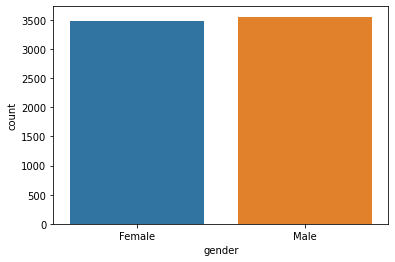

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303
##########################################


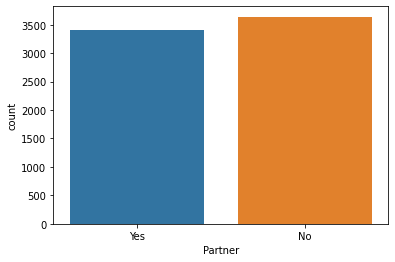

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959
##########################################


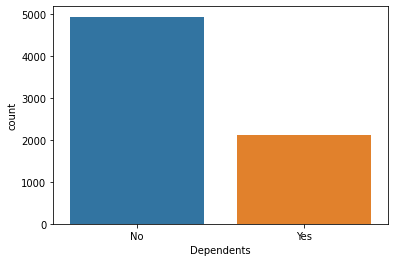

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683
##########################################


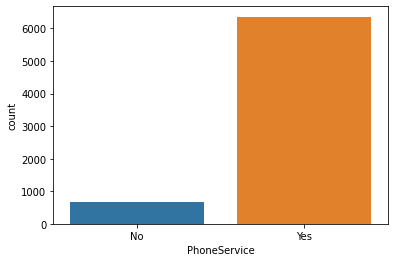

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


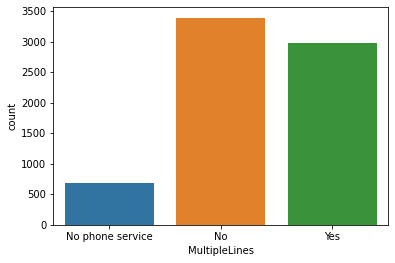

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
##########################################


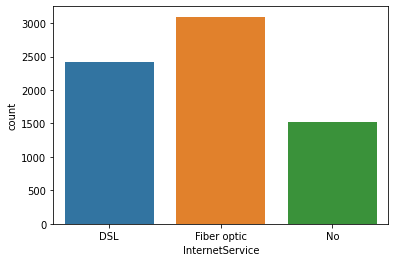

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


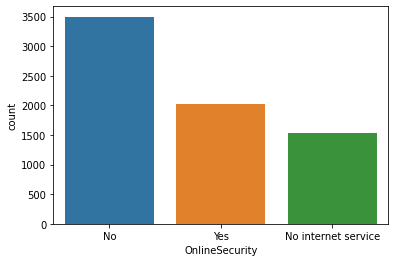

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


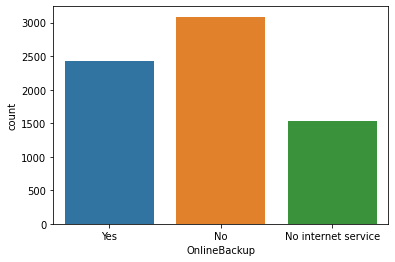

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


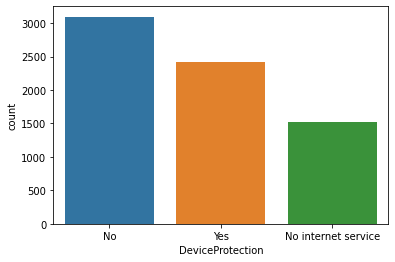

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


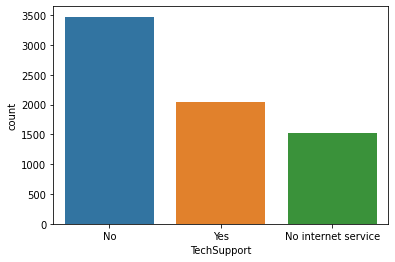

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


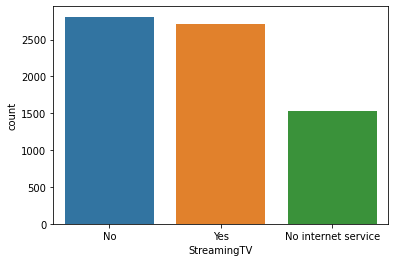

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


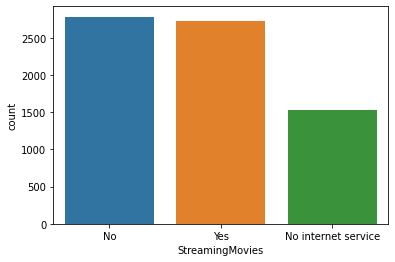

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


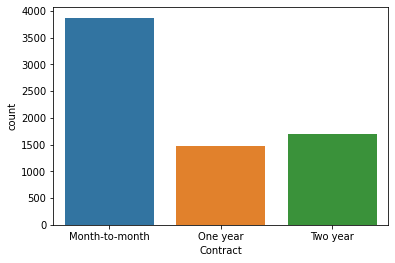

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778
##########################################


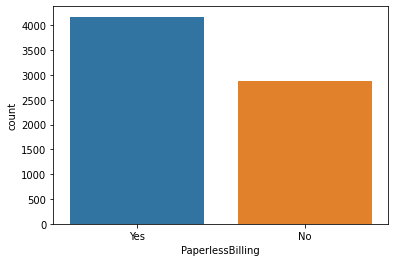

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


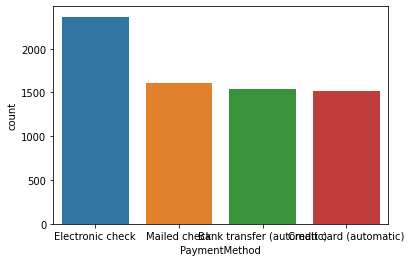

   Churn  Ratio
0   5174 73.463
1   1869 26.537
##########################################


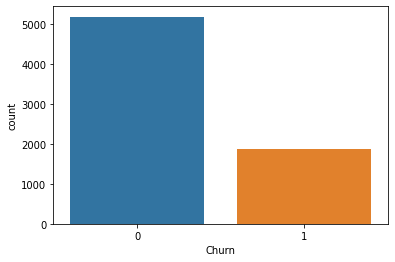

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215
##########################################


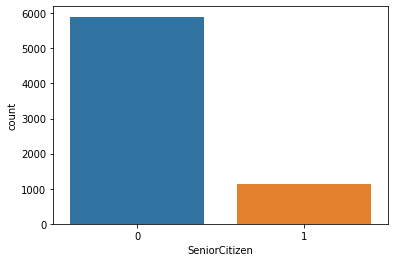

In [18]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

Numerik Değişkenlerin Analizi

In [19]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

Tenure'a bakıldığında 1 aylık müşterilerin çok fazla olduğunu ardından da 70 aylık müşterilerin geldiği görülüyor. 3 farklı sözleşme türümüz vardı. Bunun farklı sözleşmelerden kaynaklanıp kaynaklanmadığını inceleyebiliriz. 


count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


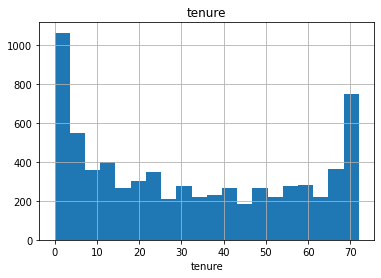

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


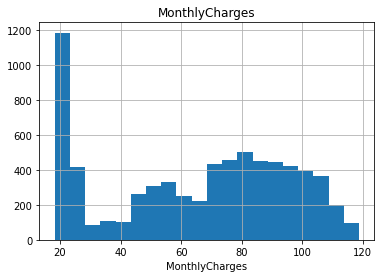

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


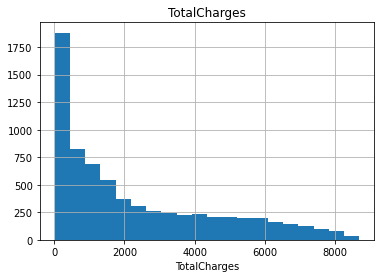

In [20]:
for col in num_cols:
    num_summary(df, col, plot=True)

1 aylık ve iki yıl üzeri kontratlardan kaynaklı tenure içerisinde bir dağılım farklılığı varmış. Bunun aslında modelde etkili olmasını bekleriz.

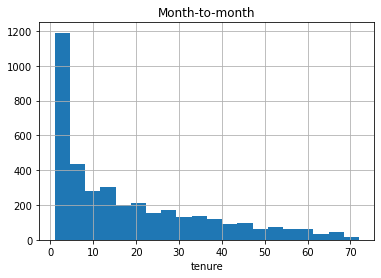

In [21]:
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

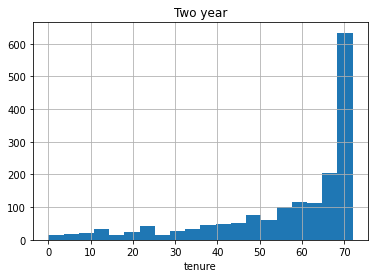

In [22]:
df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

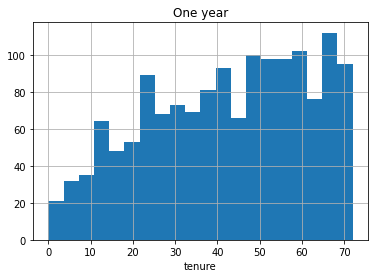

In [23]:
df[df["Contract"] == "One year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("One year")
plt.show()

**Adım 4** - Kategorik değişkenler ile hedef değişken incelemesini yapınız

In [24]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


Dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


PhoneService
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No                 0.074   1526 21.667


OnlineSecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667


O

Numerik değişkenlerin hedef değişkene göre analizi

In [25]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
0      37.570
1      17.979


       MonthlyCharges
Churn                
0              61.265
1              74.441


       TotalCharges
Churn              
0          2555.344
1          1531.796




**Adım 5** - Aykırı gözlem analizi yapınız.

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [27]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


**Adım 6** - Eksik gözlem analizi yapınız.

TotalCharges'taki boş gözlemlere bu noktada herhangi bir aksiyon almıyoruz. Daha sonra özellik çıkarımı yaparken ilgileneceğiz.

In [28]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
                    ..
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
Length: 21, dtype: int64

# Base Model

Değişkenler üzerinde herhangi bir aksiyon almadan öne base bir model kurarak inceleyelim

In [30]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [31]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [32]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,7590-VHVEG,1,29.850,29.850,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.950,1889.500,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.850,108.150,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,7795-CFOCW,45,42.300,1840.750,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.700,151.650,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [33]:
y = dff["Churn"]
X = dff.drop(["Churn","customerID","TotalCharges"], axis=1)              # TotalCharges içerisinde missing value olduğundan modeli çalıştırdığımızda anlamlı bir değişken olduğu için çalışmayacaktı, sokmadık

models = [('LR', LogisticRegression(random_state=46)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46))
          #,("CatBoost", CatBoostClassifier(verbose=False, random_state=46))
          ]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


########## LR ##########
Accuracy: 0.8008
Auc: 0.8434
Recall: 0.542
Precision: 0.649
F1: 0.5905
########## KNN ##########
Accuracy: 0.7698
Auc: 0.7802
Recall: 0.5158
Precision: 0.5747
F1: 0.5432
########## CART ##########
Accuracy: 0.7363
Auc: 0.6666
Recall: 0.5142
Precision: 0.5044
F1: 0.5088
########## RF ##########
Accuracy: 0.7899
Auc: 0.819
Recall: 0.4858
Precision: 0.6378
F1: 0.5513
########## SVM ##########
Accuracy: 0.7931
Auc: 0.7827
Recall: 0.4596
Precision: 0.659
F1: 0.5407
########## XGB ##########
Accuracy: 0.8059
Auc: 0.8478
Recall: 0.5179
Precision: 0.6765
F1: 0.586
########## LightGBM ##########
Accuracy: 0.7961
Auc: 0.8348
Recall: 0.5238
Precision: 0.6441
F1: 0.5772


# Gorev 2  Feature Engineering

Bu noktada df dataframe'imize geri dönüyoruz

In [34]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


**Adım 1** - Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.
Aykırı gözlemimiz yoktu onlarla ilgili aksiyon almamıza gerek yok. Eksik gözleme bu noktada aksiyon alabiliriz.



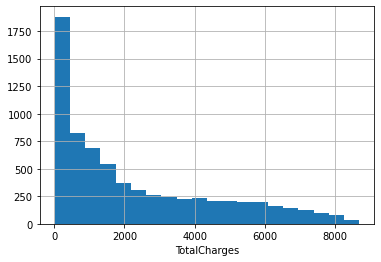

In [35]:
df["TotalCharges"].hist(bins=20)
plt.xlabel("TotalCharges")
plt.show()

In [36]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

**Adım 2** - Yeni değişkenler oluşturunuz



*CustomerTime* değişkeni

Müşterilik süresi ve terk arasındaki ilişkinin grafiksel incelenmesi

Grafiksel olarak incelediğimizde özellikle ilk 12 aydaki terkin daha fazla olduğu, müşterilik süresi arttıkça terk etme durumunun azaldığını yorumlayabiliriz. Bu grafiği incelememiz sonucunda müşterilik aylarını yıl gruplarına çevirerek yeni bir değişken oluşturacağız

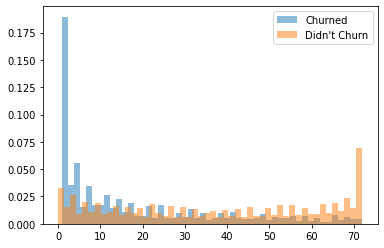

In [37]:
bins = 50
plt.hist(df[df['Churn'] == 1].tenure,
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df[df['Churn'] == 0].tenure,
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()


In [38]:
df.loc[(df['tenure'] <= 12), 'CustomerTime'] = '1year'
df.loc[(df['tenure'] > 12) & (df['tenure'] <= 48), 'CustomerTime'] = '4years'
df.loc[(df['tenure'] > 48), 'CustomerTime'] = '4years+'

df['CustomerTime'].value_counts()

2years     2618
3years+    2239
1year      2186
Name: CustomerTime, dtype: int64

*PaymentMethod_New* değişkeni

Ödeme yöntemlerinde ikisinin çek kullanımı ikisinin de banka ilişkili olmasından kaynaklı 4 grubu 2 ye indirdiğimiz bir değişken oluşturacağız

In [39]:
df.loc[(df['PaymentMethod'] == 'Bank transfer (automatic)') | (df['PaymentMethod'] == 'Credit card (automatic)'), 'PaymentMethod_New'] = 'Bank'
df.loc[(df['PaymentMethod'] == 'Mailed check') | (df['PaymentMethod'] == 'Electronic check'), 'PaymentMethod_New'] = 'Check'

df['PaymentMethod_New'].value_counts()


Check    3977
Bank     3066
Name: PaymentMethod_New, dtype: int64

In [40]:
df.drop('PaymentMethod',axis=1,inplace=True)

*LongTermContract* değişkeni
Kontratı 1 veya 2 yıllık müşterileri daha uzun döneme sahip olduğu için onları bir grup olarak aldığımız bir değişken oluşturalım

In [41]:
df["LongTermContract"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
df['LongTermContract'].value_counts()

0    3875
1    3168
Name: LongTermContract, dtype: int64

In [42]:
df.drop('Contract',axis=1,inplace=True)

*MaxPackageInternet* değişkeni 

Interneti varsa ve interneti olduktan sonra satın alabildiği diğer hizmetlerin de hepsine sahipse maximum paketi vardır diyebiliriz. 


InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies

In [43]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [44]:
df.loc[:, "MaxPackageInternet"] = np.where((df["InternetService"] != 'No') & (df["OnlineSecurity"] == 'Yes')
                                               & (df["OnlineBackup"] == 'Yes') & (df["DeviceProtection"] == 'Yes')
                                               & (df["TechSupport"] == 'Yes') & (df["StreamingTV"] == 'Yes') & (df["StreamingMovies"] == 'Yes'), '1','0')

df['MaxPackageInternet'].value_counts()

0    6759
1     284
Name: MaxPackageInternet, dtype: int64

*noSup* değişkeni 

Yan hizmetlerimizden müşteriye destek amaçlı sağladığımız ürünlerin alınıp alınmadığını gösteren değişken oluşturalım 

In [45]:
df["noSup"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)
df['noSup'].value_counts()
                       

1    6317
0     726
Name: noSup, dtype: int64

*TotalServices* değişkeni

Kişinin toplam aldığı servis sayısıı gösteren değişkeni oluşturabiliriz.

In [46]:
df['TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

df['TotalServices'].value_counts()

1    2253
4    1062
3    1041
2     996
5     827
6     525
7     259
0      80
Name: TotalServices, dtype: int64

*AvgPerMonth* değişkeni

Müşterilerin ortalama aylık ne kadarlık ödeme yapmış olduğunu gösteren bir değişken oluşturabiliriz.

In [47]:
df["AvgPerMonth"] = df["TotalCharges"] / (df["tenure"] + 1)

*CurrentIncrease* değişkeni

Güncel Fiyatın ortalama fiyata göre ne kadar daha fazla olduğunu görmek için bir değişken oluşturabiliriz.

In [48]:
df["CurrentIncrease"] = df["AvgPerMonth"] / df["MonthlyCharges"]

*StreamingService* değişkeni

Yayın ve film akışı olup olmadığını gösteren değişkenlerden herhangi bir akışı olup olmaıdğını gösteren değişken oluşturabiliriz

In [49]:
df["StreamingService"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
df['StreamingService'].value_counts()

0    3544
1    3499
Name: StreamingService, dtype: int64

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CustomerTime,PaymentMethod_New,LongTermContract,MaxPackageInternet,noSup,TotalServices,AvgPerMonth,CurrentIncrease,StreamingService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,29.850,29.850,0,1year,Check,0,0,1,1,14.925,0.500,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,56.950,1889.500,0,2years,Check,1,0,1,3,53.986,0.948,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,53.850,108.150,1,1year,Check,0,0,1,3,36.050,0.669,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,42.300,1840.750,0,2years,Bank,1,0,1,3,40.016,0.946,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,70.700,151.650,1,1year,Check,0,0,1,1,50.550,0.715,0


In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 28
cat_cols: 22
num_cols: 5
cat_but_car: 1
num_but_cat: 6


**Adım 3** - Encoding işlemlerini gerçekleştiriniz.

Label Encoding

In [52]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'PaymentMethod_New',
 'MaxPackageInternet']

In [53]:
for col in binary_cols:
    df = label_encoder(df, col)

One Hot Encoding

In [54]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'CustomerTime',
 'PaymentMethod_New',
 'MaxPackageInternet',
 'SeniorCitizen',
 'Churn',
 'LongTermContract',
 'noSup',
 'TotalServices',
 'StreamingService']

Hedef değişkenimiz ve aslında grubu değil servis sayısını ifade eden TotalServices değişkenimizi dışarıda tutuyoruz

In [55]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "TotalServices"]]

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_New,MaxPackageInternet,TotalServices,AvgPerMonth,CurrentIncrease,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,CustomerTime_2years,CustomerTime_3years+,SeniorCitizen_1,LongTermContract_1,noSup_1,StreamingService_1
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,1,0,1,14.925,0.500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,1,0,3,53.986,0.948,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,1,0,3,36.050,0.669,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,0,0,3,40.016,0.946,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,0,1,50.550,0.715,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [56]:
df.isnull().sum().sort_values(ascending=False)

customerID                              0
OnlineSecurity_No internet service      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
                                       ..
AvgPerMonth                             0
CurrentIncrease                         0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
StreamingService_1                      0
Length: 37, dtype: int64

# Modelleme

In [57]:
y = df["Churn"]
X = df.drop(["Churn","customerID"], axis=1)

In [59]:
models = [('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=46)),
          ('RF', RandomForestClassifier(random_state=46)),
          ('SVM', SVC(gamma='auto', random_state=46)),
          ('XGB', XGBClassifier(random_state=46)),
          ("LightGBM", LGBMClassifier(random_state=46)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=46))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## KNN ##########
Accuracy: 0.7632
Recall: 0.4489
Precision: 0.5687
F1: 0.5012
########## CART ##########
Accuracy: 0.7228
Recall: 0.5013
Precision: 0.4791
F1: 0.4898
########## RF ##########
Accuracy: 0.7913
Recall: 0.4912
Precision: 0.639
F1: 0.5552
########## SVM ##########
Accuracy: 0.7688
Recall: 0.2798
Precision: 0.6522
F1: 0.3911
########## XGB ##########
Accuracy: 0.8038
Recall: 0.5335
Precision: 0.6618
F1: 0.5905
########## LightGBM ##########
Accuracy: 0.798
Recall: 0.5292
Precision: 0.6466
F1: 0.5816
########## CatBoost ##########
Accuracy: 0.7988
Recall: 0.5137
Precision: 0.6542
F1: 0.5753


* Random Forest


In [60]:
rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8],
             "max_features": [3, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [100, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_best_grid.best_score_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8430444216985036

In [77]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.8003677063185043

In [78]:
cv_results['test_f1'].mean()

0.5662647943829767

In [79]:
cv_results['test_roc_auc'].mean()

0.8430444216985036

* XGBoost

In [ ]:
xgboost_model = XGBClassifier(random_state=17)

xgboost_params = {"learning_rate": [0.1, 0.001],
                  "max_depth": [5, 8, 20],
                  "n_estimators": [100, 500],
                  "colsample_bytree": [0.5, 0.7]}

xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)


In [74]:
cv_results = cross_validate(xgboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.8017891682785299

In [75]:
cv_results['test_f1'].mean()

0.5813433239971362

In [76]:
cv_results['test_roc_auc'].mean()

0.841787150165108

* LightGBM

In [62]:

lgbm_model = LGBMClassifier(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.8429371654111432

In [80]:
cv_results = cross_validate(lgbm_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
cv_results['test_accuracy'].mean()

0.8016479287556416

In [81]:
cv_results['test_f1'].mean()

0.5793850556634583

In [82]:
cv_results['test_roc_auc'].mean()

0.8429371654111432

* CatBoost

In [63]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


0.8471157489534107

In [85]:
cv_results = cross_validate(catboost_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()


0.8023573500967117

In [86]:
cv_results['test_f1'].mean()

0.5750134800503222

In [87]:
cv_results['test_roc_auc'].mean()

0.8471157489534107

In [100]:
xgboost_best_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [88]:
from sklearn.metrics import confusion_matrix
y_pred = xgboost_final.predict(X)
print(confusion_matrix(y, y_pred))

[[4788  386]
 [ 713 1156]]


# Feature Importance

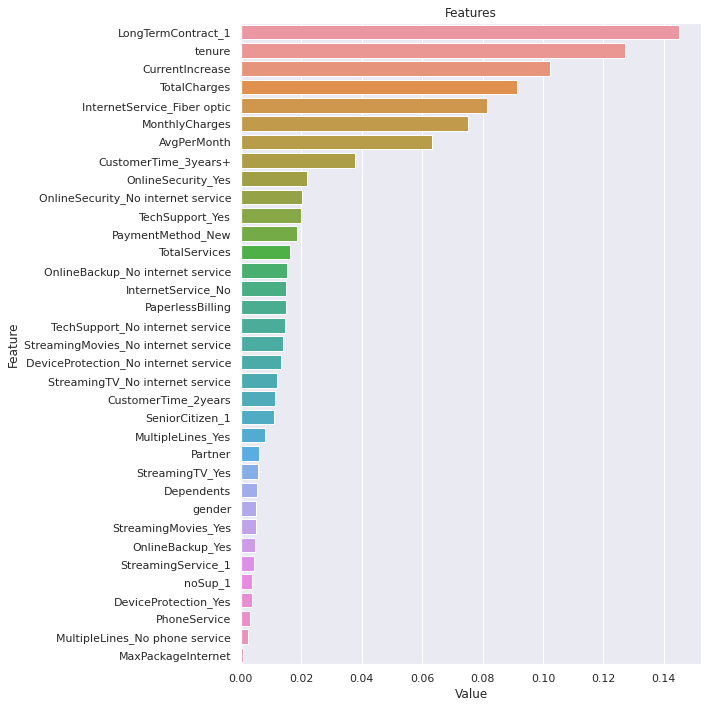

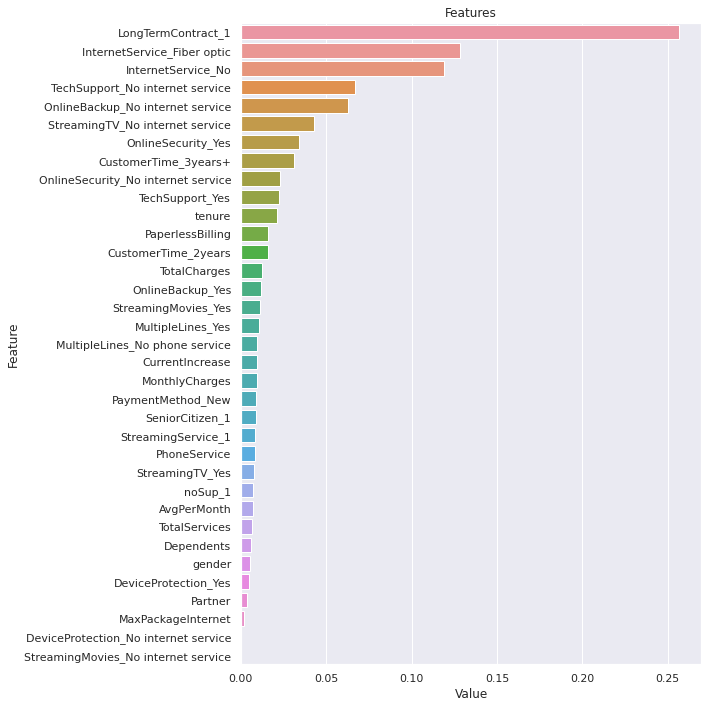

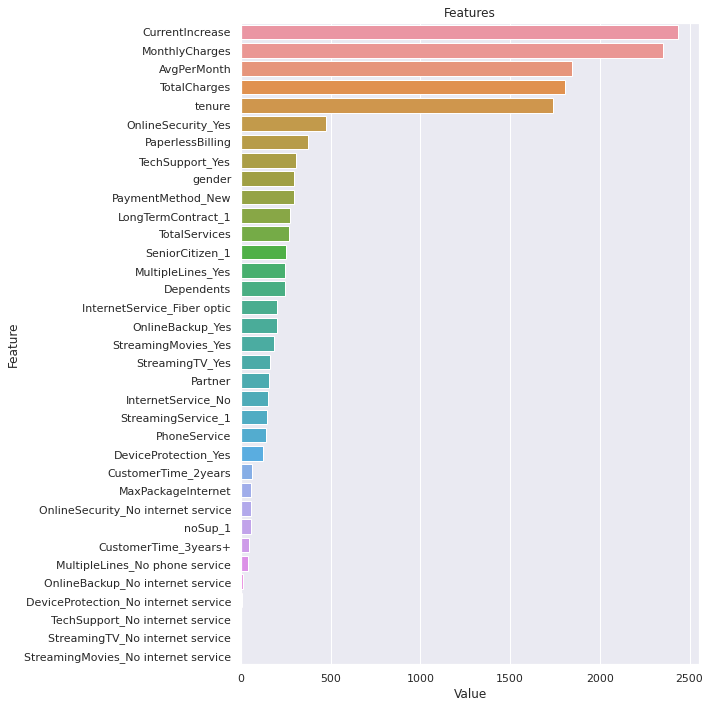

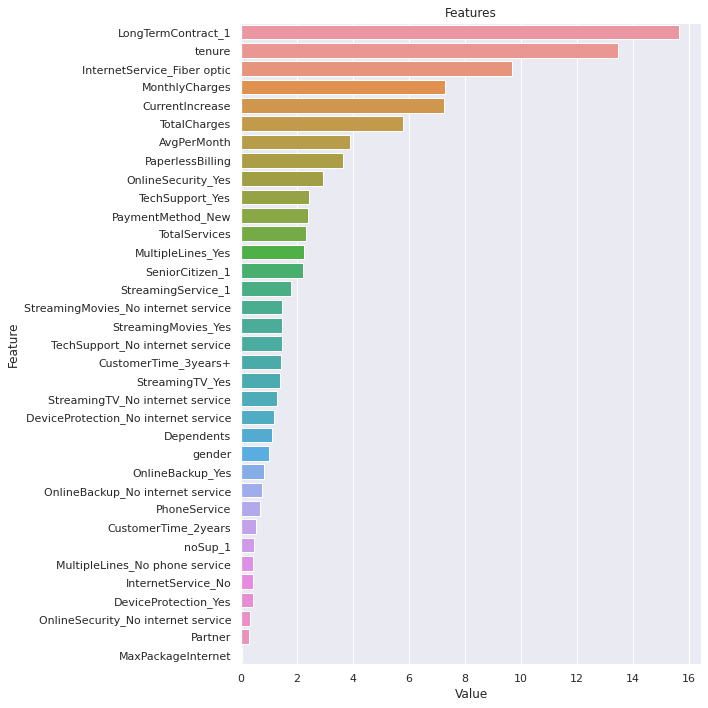

In [99]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)
plot_importance(xgboost_final, X)
plot_importance(lgbm_final, X)
plot_importance(catboost_final, X)